In [1]:
import pandas as pd 
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [3]:
# Juntando: pedidos + itens
df = orders.merge(order_items, on='order_id')

In [19]:
#adicionando pagamentos e cliente
df = orders.merge(order_items, on='order_id')
df = df.merge(payments, on='order_id')
df = df.merge(customers, on='customer_id')
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [5]:
df.shape

(117601, 22)

In [6]:
agrupado = df.groupby(['customer_state']).size()
agrupado

customer_state
AC       95
AL      458
AM      171
AP       84
BA     4048
CE     1551
DF     2473
ES     2338
GO     2430
MA      844
MG    13638
MS      843
MT     1125
PA     1116
PB      639
PE     1889
PI      573
PR     5962
RJ    15327
RN      569
RO      286
RR       52
RS     6486
SC     4302
SE      397
SP    49566
TO      339
dtype: int64

In [7]:
df.columns.tolist()


['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

<Axes: xlabel='customer_state', ylabel='payment_value'>

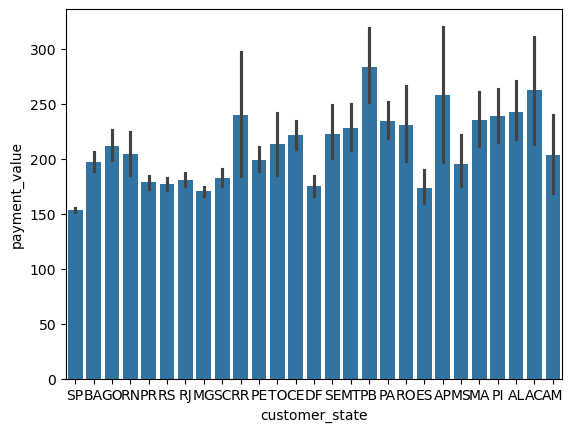

In [8]:
sns.barplot(data=df, x='customer_state', y='payment_value')


([<matplotlib.patches.Wedge at 0x21a1d458d70>,
 [Text(1.099954779368014, 0.00997413382022702, 'Não aprovados'),
  Text(0.6711092030265309, 0.8715574780891361, 'Não enviados'),
  Text(-0.6789841534291906, -0.8654366062237288, 'Não entregues')],
 [Text(0.5999753342007348, 0.0054404366292147375, '0.3%'),
  Text(0.36605956528719863, 0.47539498804861957, '28.5%'),
  Text(-0.37035499277955847, -0.47205633066748837, '71.2%')])

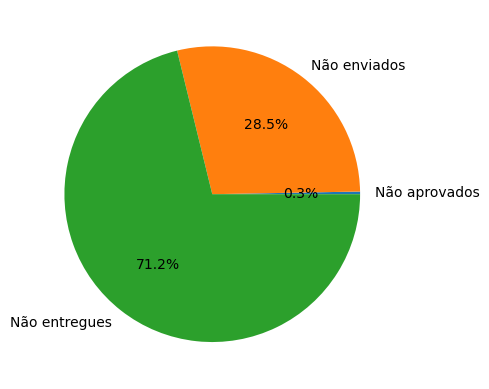

In [9]:
plt.pie([15,1483,3699], labels=['Não aprovados','Não enviados','Não entregues'], autopct='%1.1f%%')


<Axes: xlabel='customer_state'>

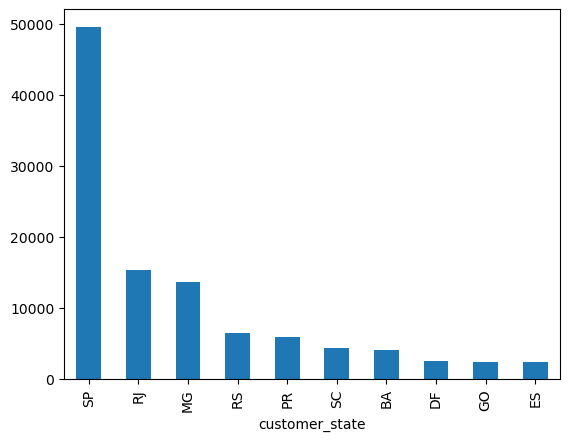

In [10]:
df['customer_state'].value_counts().head(10).plot(kind='bar')



<Axes: xlabel='customer_state'>

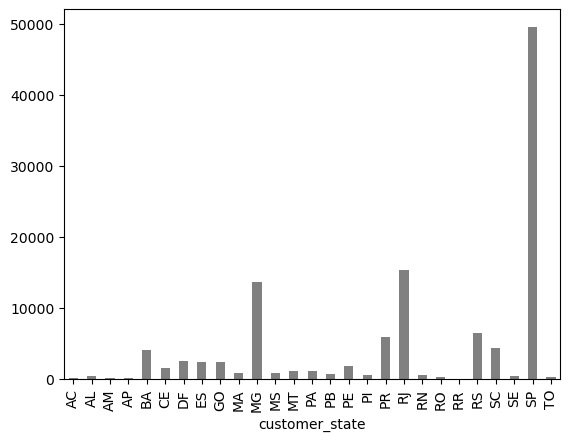

In [11]:
agrupado.plot.bar(color = 'gray')

#Aqui podemos conferir os 3 estados que mais compraram, MG, RJ e SP vencedor de número de vendas.

In [12]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [13]:
total_pedidos = df['order_id'].nunique()
print(f"Total de pedidos: {total_pedidos}")

Total de pedidos: 98665


In [14]:
nao_aprovados = 15
nao_enviados = 1483
nao_entregues = 3699



pct_nao_aprovados = (nao_aprovados / total_pedidos) * 100
pct_nao_enviados = (nao_enviados / total_pedidos) * 100
pct_nao_entregues = (nao_entregues / total_pedidos) * 100
soma_porcentagem = pct_nao_aprovados + pct_nao_entregues + pct_nao_enviados

print(f"Pedidos não aprovados: {pct_nao_aprovados:.2f}%")
print(f"Pedidos não enviados: {pct_nao_enviados:.2f}%")
print(f"Pedidos não entregues: {pct_nao_entregues:.2f}%")
print(f"A soma dessa porcentagem: {soma_porcentagem:.2f}%")



Pedidos não aprovados: 0.02%
Pedidos não enviados: 1.50%
Pedidos não entregues: 3.75%
A soma dessa porcentagem: 5.27%


In [15]:
total_clientes = df['customer_id'].nunique()
print(f"Total de clientes: {total_clientes}")


Total de clientes: 98665


In [16]:
df.drop(columns=['payment_value'], inplace=True)
df.rename(columns={'payment_value_y': 'payment_value'}, inplace=True)


In [20]:
receita_total = df['payment_value'].sum()
print(f"Total da receita sem valores duplicados: R${receita_total:.2f}")


Total da receita sem valores duplicados: R$20308134.71


In [21]:
ticket_medio = df.groupby('order_id')['payment_value'].sum().mean()
print(f"O ticket médio é: R${ticket_medio:.2f}")

O ticket médio é: R$205.83


In [22]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


In [25]:
# Converter a data de compra para período mensal
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Calcular receita mensal
receita_mensal = df.groupby('month')['payment_value'].sum()

# Exibir para conferir
print(receita_mensal.head())


month
2016-09       347.52
2016-10     73914.58
2016-12        19.62
2017-01    187779.41
2017-02    344134.79
Freq: M, Name: payment_value, dtype: float64


In [26]:
crescimento_total = ((receita_mensal.iloc[-1] - receita_mensal.iloc[0]) / receita_mensal.iloc[0]) * 100
print(f"Crescimento total da receita no período: {crescimento_total:.2f}%")


Crescimento total da receita no período: -52.10%


#Queda na Receita Total:
Ao longo do período analisado, observou-se uma redução de 52,1% na receita total mensal, indicando possível desaceleração das vendas nos meses finais ou inconsistência temporal no registro de dados.